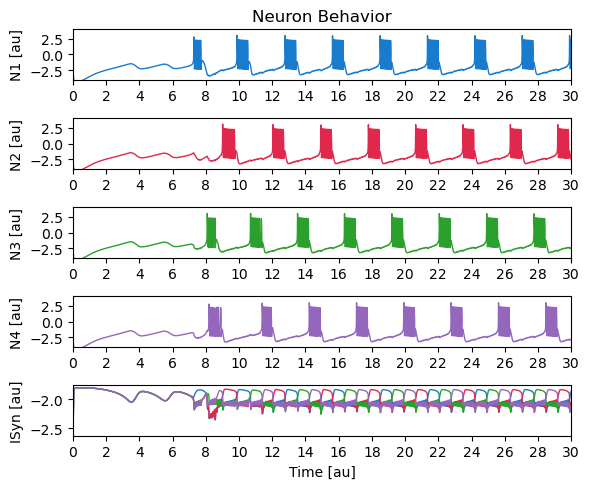

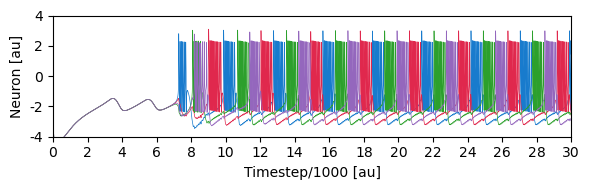

In [1]:
# 4 Neuron Code (mostly untouched)
# I added some comments to help direct you though!
import numpy as np, matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy.interpolate import interp1d

tmax=int(30000)
t=np.arange(tmax)

### Synapse Parameters ###
# synapse is not linearized function
asyn=np.array([[0,-0.3,-0.3,-0.3],
               [-0.3,0,-0.3,-0.3],
               [-0.3,-0.3,0,-0.3],
               [-0.3,-0.3,-0.3,0]])
dsyn=np.array([[-1,-1,-1,-1],
               [-1,-1,-1,-1],
               [-1,-1,-1,-1],
               [-1,-1,-1,-1]])

b=2

# Synapse Function (Sigmoid) X: is voltage (in our case is set at Vs), b=Steepness of the funxtion, ds= center position in the x axis)
def sf(x,b,ds):
    k=b*(x-ds)
    return 1/(1+np.exp(-k))

# Iapp
Iapp = np.array([-1.8,-1.8,-1.8,-1.8])

### Neurons parameters ###
# [af-,as+,as-,aus+]
alpha=np.array([-2,2,-1.5,1.5])

# [df-,ds+,ds-,dus+]
delta=np.array([0,0,-1.5,-1.5])
# delta=np.array([0,0,-1.5,-1.5])

# in the single neuron notebook, I broke up the [vm, vf, vs, vus] equations into separate functions
def dsdt(t,S):
    vm1, vf1, vs1, vus1, vm2, vf2, vs2, vus2, vm3, vf3, vs3, vus3, vm4, vf4, vs4, vus4 =S
    Isyn1=Iapp[0]+asyn[1][0]*sf(vs2,b,dsyn[1][0])+asyn[2][0]*sf(vs3,b,dsyn[2][0])+asyn[3][0]*sf(vs4,b,dsyn[3][0])
    Isyn2=Iapp[1]+asyn[0][1]*sf(vs1,b,dsyn[0][1])+asyn[2][1]*sf(vs3,b,dsyn[2][1])+asyn[3][1]*sf(vs4,b,dsyn[3][1])
    Isyn3=Iapp[2]+asyn[0][2]*sf(vs1,b,dsyn[0][2])+asyn[1][2]*sf(vs2,b,dsyn[1][2])+asyn[3][2]*sf(vs4,b,dsyn[3][2])
    Isyn4=Iapp[3]+asyn[0][3]*sf(vs1,b,dsyn[0][3])+asyn[1][3]*sf(vs2,b,dsyn[1][2])+asyn[2][3]*sf(vs3,b,dsyn[2][3])
    
    return [-vm1-alpha[0]*np.tanh(vf1-delta[0])-alpha[1]*np.tanh(vs1-delta[1])-alpha[2]*np.tanh(vs1-delta[2])-alpha[3]*np.tanh(vus1-delta[3])+Isyn1,vm1-vf1,(vm1-vs1)/50,(vm1-vus1)/2500,
            -vm2-alpha[0]*np.tanh(vf2-delta[0])-alpha[1]*np.tanh(vs2-delta[1])-alpha[2]*np.tanh(vs2-delta[2])-alpha[3]*np.tanh(vus2-delta[3])+Isyn2,vm2-vf2,(vm2-vs2)/50,(vm2-vus2)/2500,
            -vm3-alpha[0]*np.tanh(vf3-delta[0])-alpha[1]*np.tanh(vs3-delta[1])-alpha[2]*np.tanh(vs3-delta[2])-alpha[3]*np.tanh(vus3-delta[3])+Isyn3,vm3-vf3,(vm3-vs3)/50,(vm3-vus3)/2500,
            -vm4-alpha[0]*np.tanh(vf4-delta[0])-alpha[1]*np.tanh(vs4-delta[1])-alpha[2]*np.tanh(vs4-delta[2])-alpha[3]*np.tanh(vus4-delta[3])+Isyn4,vm4-vf4,(vm4-vs4)/50,(vm4-vus4)/2500]


vm1_0, vf1_0, vs1_0, vus1_0 = -1,0,0,0
vm2_0, vf2_0, vs2_0, vus2_0 = -1,0,0,0
vm3_0, vf3_0, vs3_0, vus3_0 = -1,0,0,0
vm4_0, vf4_0, vs4_0, vus4_0 = -1,0,0,0

S_0 = (vm1_0, vf1_0, vs1_0, vus1_0,
       vm2_0, vf2_0, vs2_0, vus2_0,
       vm3_0, vf3_0, vs3_0, vus3_0,
       vm4_0, vf4_0, vs4_0, vus4_0) 

sol_m1 = odeint(dsdt,y0=S_0,t=t,tfirst=True) # euler's method

# Voltages
vm1,vm2,vm3,vm4=sol_m1.T[0],sol_m1.T[4],sol_m1.T[8],sol_m1.T[12]
vf1,vf2,vf3,vf4=sol_m1.T[1],sol_m1.T[5],sol_m1.T[9],sol_m1.T[13]
vs1,vs2,vs3,vs4=sol_m1.T[2],sol_m1.T[6],sol_m1.T[10],sol_m1.T[14]
vus1,vus2,vus3,vus4=sol_m1.T[3],sol_m1.T[7],sol_m1.T[11],sol_m1.T[15]

# Iapp
I1=Iapp[0]+asyn[1][0]*sf(vs2,b,dsyn[1][0])+asyn[2][0]*sf(vs3,b,dsyn[2][0])+asyn[3][0]*sf(vs4,b,dsyn[3][0])
I2=Iapp[1]+asyn[0][1]*sf(vs1,b,dsyn[0][1])+asyn[2][1]*sf(vs3,b,dsyn[2][1])+asyn[3][1]*sf(vs4,b,dsyn[3][1])
I3=Iapp[2]+asyn[0][2]*sf(vs1,b,dsyn[0][2])+asyn[1][2]*sf(vs2,b,dsyn[1][2])+asyn[3][2]*sf(vs4,b,dsyn[3][2])
I4=Iapp[3]+asyn[0][3]*sf(vs1,b,dsyn[0][3])+asyn[1][3]*sf(vs2,b,dsyn[1][2])+asyn[2][3]*sf(vs3,b,dsyn[2][3])

### Plot ###
plt.figure(figsize=(6,5), tight_layout=True)
# N1 Blue
plt.subplot(5,1,1)
plt.title("Neuron Behavior")
plt.plot(t,vm1,color='#187bcd',lw=1)
plt.xlim(0,tmax)
plt.xticks(np.arange(0,tmax+2000,2000),np.arange(0,(tmax//1000)+(2000//1000),2000//1000).astype(str))
plt.ylim(-4,4)
plt.ylabel("N1 [au]")

# N2 Red
plt.subplot(5,1,2)
plt.plot(t[0:tmax],vm2[0:tmax],color='#e0284d',lw=1)

plt.xlim(0,tmax)
plt.xticks(np.arange(0,tmax+2000,2000),np.arange(0,(tmax//1000)+(2000//1000),2000//1000).astype(str))
plt.ylim(-4,4)
plt.ylabel("N2 [au]")

# N3 Red
plt.subplot(5,1,3)
plt.plot(t[0:tmax],vm3[0:tmax],color='tab:green',lw=1)

plt.xlim(0,tmax)
plt.xticks(np.arange(0,tmax+2000,2000),np.arange(0,(tmax//1000)+(2000//1000),2000//1000).astype(str))
plt.ylim(-4,4)
plt.ylabel("N3 [au]")

# N4 Red
plt.subplot(5,1,4)
plt.plot(t[0:tmax],vm4[0:tmax],color='tab:purple',lw=1)

plt.xlim(0,tmax)
plt.xticks(np.arange(0,tmax+2000,2000),np.arange(0,(tmax//1000)+(2000//1000),2000//1000).astype(str))
plt.ylim(-4,4)
plt.ylabel("N4 [au]")

# Isyn
plt.subplot(5,1,5)
plt.plot(t,I1,lw=1,color='#187bcd',label='$N_{1}$')
plt.plot(t,I2,lw=1,color='#e0284d',label='$N_{2}$')
plt.plot(t,I3,lw=1,color='tab:green',label='$N_{2}$')
plt.plot(t,I4,lw=1,color='tab:purple',label='$N_{2}$')

plt.xlim(0,tmax)
plt.xticks(np.arange(0,tmax+2000,2000),np.arange(0,(tmax//1000)+(2000//1000),2000//1000).astype(str))
# plt.ylim(-1.7,-0.9)
plt.ylabel("ISyn [au]")
plt.xlabel("Time [au]")

# All in one plot
plt.figure(figsize=(6,2),tight_layout=True)
plt.plot(t,vm1,color='#187bcd',lw=0.5)
plt.plot(t,vm2,color='#e0284d',lw=0.5)
plt.plot(t,vm3,color='tab:green',lw=0.5)
plt.plot(t,vm4,color='tab:purple',lw=0.5)

plt.xlim(0,tmax)
plt.xticks(np.arange(0,tmax+2000,2000),np.arange(0,(tmax//1000)+(2000//1000),2000//1000).astype(str))
plt.ylim(-4,4)
plt.yticks([-4,-2,0,2,4],[-4,-2,0,2,4])

plt.ylabel("Neuron [au]")
plt.xlabel("Timestep/1000 [au]")

plt.show()